### 03-6 데이터 저장하고 불러오기

In [2]:
import pandas as pd

In [4]:
scientists = pd.read_csv('./data/scientists.csv')

In [5]:
names = scientists['Name']
names.to_pickle('./output/scientists_names_series.pickle')

In [6]:
scientists.to_pickle('./output/scientists_df.pickle')

In [7]:
scientist_names_from_pickle = pd.read_pickle('./output/scientists_names_series.pickle')
print(scientist_names_from_pickle)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [9]:
scientists_from_pickle = pd.read_pickle('./output/scientists_df.pickle')
print(scientists_from_pickle)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician


In [10]:
names.to_csv('./output/scientist_names_series.csv')
scientists.to_csv('./output/scientists_df.tsv', sep='\t')

In [11]:
names_df = names.to_frame()

import xlwt
names_df.to_excel('./output/scientists_names_series_df.xls')

import openpyxl
names_df.to_excel('./output/scientists_names_series_df.xlsx')

## 04 그래프 그리기
### 04-1 데이터 시각화가 필요한 이유
* 앤스콤 4분할 그래프 살펴보기

In [13]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

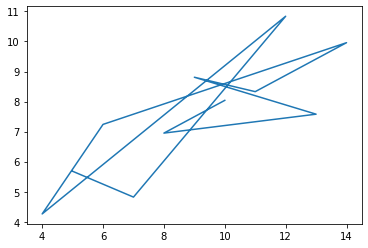

In [21]:
plt.plot(dataset_1['x'], dataset_1['y'])
plt.show()

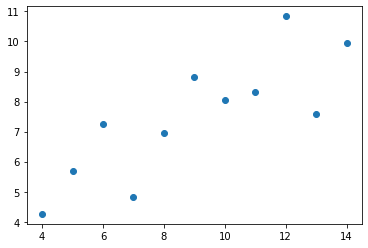

In [22]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')
plt.show()

* 앤스콤 데이터 집합 모두 사용해 그래프 만들기

In [24]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

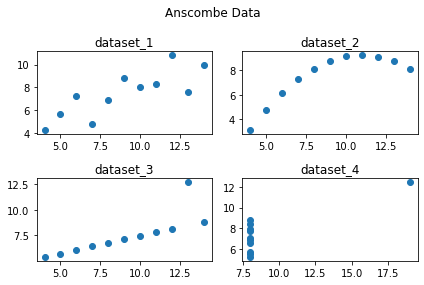

In [31]:
fig = plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data')
fig.tight_layout()

plt.show()

### 04-2 matplotlib 라이브러리 자유자재로 사용하기
* 기초 그래프 그리기

In [35]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))
print(tips['total_bill'].max())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
50.81


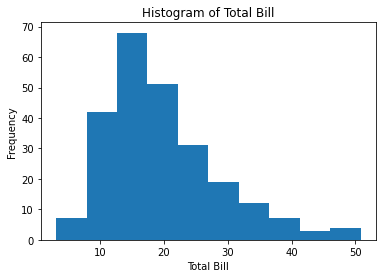

In [36]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')

plt.show()

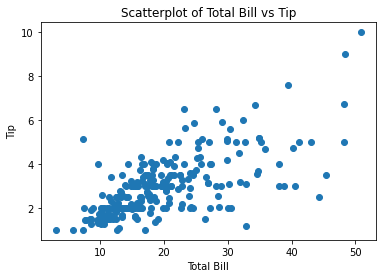

In [37]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()

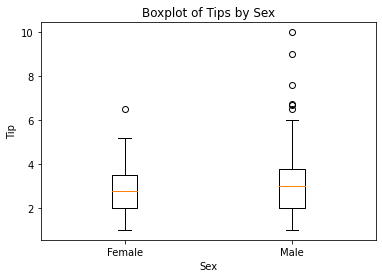

In [39]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([
        tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip']
    ],
    labels=['Female', 'Male']
)

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

plt.show()

* 다변량 그래프 그리기

In [41]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [42]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

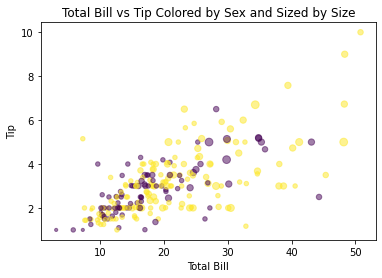

In [43]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5
)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()